In [88]:
from ffipy import FFIEC_Client
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
# help('ffipy.FFIEC_Client')

In [90]:
failed_banks = pd.read_csv('data/failed_banks_dataset.csv')
len(failed_banks)

556

In [91]:
failed_banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 7 columns):
Bank Name                556 non-null object
City                     556 non-null object
ST                       556 non-null object
CERT                     556 non-null int64
Acquiring Institution    556 non-null object
Closing Date             556 non-null object
Updated Date             556 non-null object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB


In [92]:
failed_banks['Date'] = pd.to_datetime(failed_banks['Closing Date'])
failed_banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 8 columns):
Bank Name                556 non-null object
City                     556 non-null object
ST                       556 non-null object
CERT                     556 non-null int64
Acquiring Institution    556 non-null object
Closing Date             556 non-null object
Updated Date             556 non-null object
Date                     556 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 34.8+ KB


In [93]:
failed_banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,Date
0,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.",31-May-19,22-Aug-19,2019-05-31
1,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,24-Jul-19,2017-12-15
2,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,12-Aug-19,2017-10-13
3,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,29-Jan-19,2017-05-26
4,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,22-Mar-18,2017-05-05


In [94]:
# Insert missing years when failed_banks == 0
failed_banks.groupby(failed_banks.Date.dt.year)['Bank Name'].count()

Date
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
2019      1
Name: Bank Name, dtype: int64

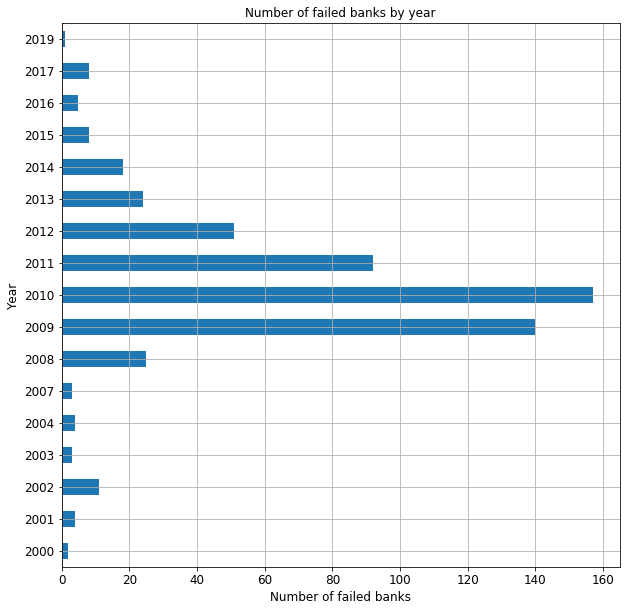

In [95]:
ax = failed_banks.groupby(failed_banks.Date.dt.year)['Bank Name'].count().plot(
    kind='barh', title ="Number of failed banks by year", figsize=(10, 10), legend=False, fontsize=12)
ax.grid()
ax.set_xlabel("Number of failed banks", fontsize=12)
ax.set_ylabel("Year", fontsize=12)
plt.show()

In [96]:
client = FFIEC_Client()
report_periods = client.retrieve_ubpr_reporting_periods()
len(report_periods)

67

In [97]:
#report_periods


In [133]:
#client = FFIEC_Client()
# get a list of RSSD codes for filers on all the periods, store in dictionary
filers_bydate_dict = {}
count_bydate_dict = {}
for period in report_periods:
    filers_bydate =  client.retrieve_filers_since_date(ds_name='Call', 
                                                      reporting_pd_end=period, last_update_date=period)
    filers_bydate.sort()
    filers_bydate_dict[period] = filers_bydate
    #count_bydate_dict[period] = len(filers_bydate)
  


In [155]:
# TO DO - need to find a way to trace banks through time, drop all de novo (less than 5 years, i.e 20 reports)
all_banks = pd.DataFrame.from_dict(filers_bydate_dict, orient='index').T


In [136]:
all_banks.to_csv('data/core_banks_dataset.csv', index=False)

In [193]:
import sys 
sys.getsizeof(filers_bydate_dict)

2280

In [137]:
core_banks_df = pd.read_csv('data/core_banks_dataset.csv', dtype='Int64')

In [128]:
#columns_for_sort = core_banks_df.columns
len(columns_for_sort)

67

In [161]:
core_banks_df.isna().describe()

,0,1,2,3,4,5,6,7,8,9,...,8458,8459,8460,8461,8462,8463,8464,8465,8466,8467
count,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
unique,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
freq,67,67,67,67,67,67,67,67,67,67,...,66,66,66,66,66,66,66,66,66,66


In [150]:
bank_stats = core_banks_df.T.head().copy()

In [154]:
bank_stats

,0,1,2,3,4,5,6,7,8,9,...,8458,8459,8460,8461,8462,8463,8464,8465,8466,8467
12/31/2002,37,242,279,354,439,457,505,1146,1155,1351,...,3146150,3150205,3150335,3151060,3151837,3153297,3154780,3155134,3156122,3157183
3/31/2003,37,242,279,354,439,457,505,1146,1155,1351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6/30/2003,37,242,279,354,439,457,505,1146,1155,1351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9/30/2003,37,242,279,354,439,457,505,1146,1155,1351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12/31/2003,37,242,279,354,439,457,505,1146,1155,1351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
bank_universe = pd.DataFrame.from_dict(count_bydate_dict, orient='index')
bank_universe['Date'] = bank_universe.index
bank_universe.Date = pd.to_datetime(bank_universe['Date'])
bank_universe.columns = ['Number of banks', 'Date']
bank_universe['Year'] = bank_universe.Date.dt.year
bank_universe.to_csv('data/bank_universe.csv', index=False)

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [163]:
ax = bank_universe.groupby('Year')['Number of banks'].mean().plot(kind='barh',
                        title ="Number of banks by year", figsize=(10, 10), legend=False, fontsize=12)
ax.grid()
ax.set_xlabel("Number of banks", fontsize=12)
ax.set_ylabel("Year", fontsize=12)
plt.show()

KeyError: 'Year'

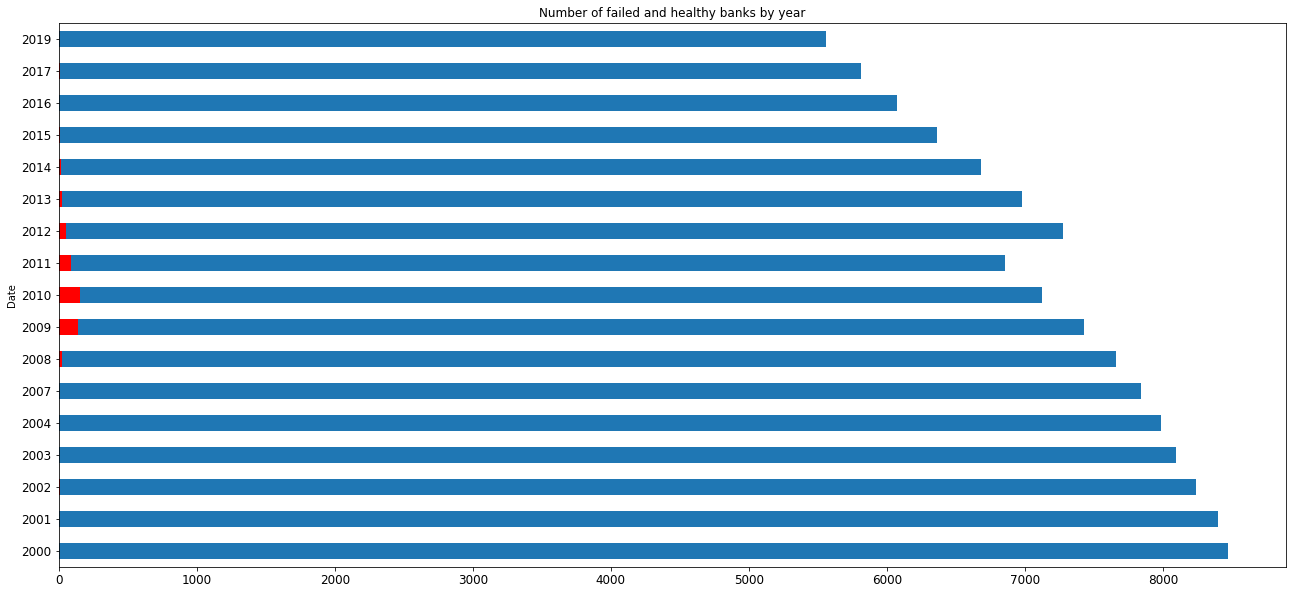

In [183]:
ax1 = bank_universe.groupby('Year')['Number of banks'].mean().plot(kind='barh',
                        title ="Number of banks by year", figsize=(10, 10), legend=False, fontsize=12)
ax2 = failed_banks.groupby(failed_banks.Date.dt.year)['Bank Name'].count().plot(
    kind='barh', title ="Number of failed and healthy banks by year", figsize=(22, 10), legend=False, color='red', fontsize=12)

ax.grid()
ax.set_xlabel("Number of banks", fontsize=12)
ax.set_ylabel("Year", fontsize=12)
plt.show()


In [13]:
# TO DO:  a new column "Last Report" use map function if Data < Report date 
failed_banks

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,Date
0,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.",31-May-19,22-Aug-19,2019-05-31
1,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,24-Jul-19,2017-12-15
2,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,12-Aug-19,2017-10-13
3,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,29-Jan-19,2017-05-26
4,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,22-Mar-18,2017-05-05
5,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,29-Jan-19,2017-04-28
6,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,29-Jan-19,2017-03-03
7,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,29-Jan-19,2017-01-27
8,Harvest Community Bank,Pennsville,NJ,34951,First-Citizens Bank & Trust Company,13-Jan-17,18-May-17,2017-01-13
9,Allied Bank,Mulberry,AR,91,Today's Bank,23-Sep-16,13-May-19,2016-09-23


In [50]:
# call report method
#client = FFIEC_Client()
ds_name = 'Call'    # Pull Call report data
end_date = '3/31/2019'  # Pull data in reporting pd ending 3/31/17
fiID_type = 'FDICCertNumber'  # Type of financial inst identifier (ID_RSSD, CERT )
fiID = 10716   # Indentifier for Wyomin Bank and Trust
fmt = 'SDF'  # Pull report as PDF
# <facsimileFormat>PDF or XBRL or SDF</facsimileFormat>
outfile = 'test8.PDF'  # Output file path
return_result = True  # If True, method returns the data
f = client.retrieve_facsimile(ds_name=ds_name, reporting_pd_end=end_date,
                              fiID_type=fiID_type, fiID=fiID,
                              facsimile_fmt=fmt, outfile=False,
                              return_result=True)
report = StringIO(str(f, 'utf-8'))



In [51]:
report_df = pd.read_csv(report, sep=';')
report_df.head(5)

,Call Date,Bank RSSD Identifier,MDRM #,Value,Last Update,Short Definition,Call Schedule,Line Number
0,20190331,431958,RCOA3792,3525,20190503,Total capital (sum of items 26 and 34),RCRI,35
1,20190331,431958,RCOA5310,158,20190503,Allowance for loan and lease losses includable...,RCRI,30
2,20190331,431958,RCOA5311,158,20190503,Tier 2 capital (greater of item 32 minus item ...,RCRI,34
3,20190331,431958,RCOA7204,9.2272%,20190503,Tier 1 leverage ratio (item 26 divided by item...,RCRI,44
4,20190331,431958,RCOA7205,11.5211%,20190503,Total capital ratio (item 35 divided by item 40),RCRI,43


In [53]:
report_df.columns = ['Call Date', 'Bank RSSD Identifier', 'ValueID', 'Value', 'Last Update',
       'Short Definition', 'Call Schedule', 'Line Number']`

In [55]:
report_df.head()

,Call Date,Bank RSSD Identifier,ValueID,Value,Last Update,Short Definition,Call Schedule,Line Number
0,20190331,431958,RCOA3792,3525,20190503,Total capital (sum of items 26 and 34),RCRI,35
1,20190331,431958,RCOA5310,158,20190503,Allowance for loan and lease losses includable...,RCRI,30
2,20190331,431958,RCOA5311,158,20190503,Tier 2 capital (greater of item 32 minus item ...,RCRI,34
3,20190331,431958,RCOA7204,9.2272%,20190503,Tier 1 leverage ratio (item 26 divided by item...,RCRI,44
4,20190331,431958,RCOA7205,11.5211%,20190503,Total capital ratio (item 35 divided by item 40),RCRI,43


In [57]:
report_df.loc[report_df.ValueID == 'RIAD4073']

,Call Date,Bank RSSD Identifier,ValueID,Value,Last Update,Short Definition,Call Schedule,Line Number
876,20190331,431958,RIAD4073,103,20190503,Total interest expense (sum of items 2.a throu...,RI,2e


In [34]:
# focus on failed banks, for POC start with anks that failed in 2010, look at 4 quarters, do count of failed banks
# ID, and pull CAll reports for all of them - > 4 tables for 4 quarters or 3D tensor...

In [69]:
# report periods given by running line of code below: 
#report_periods
failed_banks['Year_failed'] = failed_banks['Date'].dt.year
failed_banks['Quarter_failed'] = failed_banks['Date'].dt.quarter

In [79]:
failed_banks_2010Q4 = failed_banks.loc[(failed_banks.Year_failed == 2010) & (failed_banks.Quarter_failed == 4)]
failed_banks_Q42010

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,Date,Year_failed,Quarter_failed
207,Community National Bank,Lino Lakes,MN,23306,Farmers & Merchants Savings Bank,17-Dec-10,10-Nov-16,2010-12-17,2010,4
208,First Southern Bank,Batesville,AR,58052,Southern Bank,17-Dec-10,29-Jan-19,2010-12-17,2010,4
209,"United Americas Bank, N.A.",Atlanta,GA,35065,State Bank and Trust Company,17-Dec-10,17-Oct-15,2010-12-17,2010,4
210,"Appalachian Community Bank, FSB",McCaysville,GA,58495,Peoples Bank of East Tennessee,17-Dec-10,29-Jan-19,2010-12-17,2010,4
211,Chestatee State Bank,Dawsonville,GA,34578,Bank of the Ozarks,17-Dec-10,21-Sep-15,2010-12-17,2010,4
212,"The Bank of Miami,N.A.",Coral Gables,FL,19040,1st United Bank,17-Dec-10,29-Jan-19,2010-12-17,2010,4
213,Earthstar Bank,Southampton,PA,35561,Polonia Bank,10-Dec-10,29-Jan-19,2010-12-10,2010,4
214,Paramount Bank,Farmington Hills,MI,34673,Level One Bank,10-Dec-10,21-Sep-15,2010-12-10,2010,4
215,First Banking Center,Burlington,WI,5287,First Michigan Bank,19-Nov-10,29-Jan-19,2010-11-19,2010,4
216,Allegiance Bank of North America,Bala Cynwyd,PA,35078,VIST Bank,19-Nov-10,26-Jul-17,2010-11-19,2010,4


In [87]:
ds_name = 'Call'    # Pull Call report data
end_date = '9/30/2010'  # Quarter-ends 12/31/2010, 9/30/2010, 6/31/2010, 3/31/2010
fiID_type = 'FDICCertNumber'  # Type of financial inst identifier (ID_RSSD, CERT )
fiID = 21777   # Indentifier for Wyomin Bank and Trust
fmt = 'SDF'  # Pull report as PDF
# <facsimileFormat>PDF or XBRL or SDF</facsimileFormat>
outfile = 'test8.PDF'  # Output file path
return_result = True  # If True, method returns the data
f = client.retrieve_facsimile(ds_name=ds_name, reporting_pd_end=end_date,
                              fiID_type=fiID_type, fiID=fiID,
                              facsimile_fmt=fmt, outfile=False,
                              return_result=True)
report3 = StringIO(str(f, 'utf-8'))
report_df3 = pd.read_csv(report3, sep=';')
report_df3.head(5)

,Call Date,Bank RSSD Identifier,MDRM #,Value,Last Update,Short Definition,Call Schedule,Line Number
0,20100930,16337,RCON0010,11542,20101029,Cash and balances dues from depository institu...,RCR,34
1,20100930,16337,RCON0020,1,20101029,Cash items in process of collection and unpost...,RCA,1a
2,20100930,16337,RCON0071,172,20101029,Interest-bearing balances,RC,1b
3,20100930,16337,RCON0073,0,20101029,Foreign branches of other U.S. banks,RCA,3a
4,20100930,16337,RCON0074,0,20101029,Other banks in foreign countries and foreign c...,RCA,3b
